In [5]:
import matplotlib.pyplot as plt

In [6]:
def plotSimulation(xf, yf, xb, yb, time):
    plt.clf()
    plt.title("Simulation of a Pure Pursuit")
    plt.plot(xf, yf, marker="o", label="Fighter", color="green")
    plt.plot(xb[:time + 1], yb[:time + 1], marker="o", label="Bomber", color="red")
    plt.xlim(-100, 200)
    plt.ylim(-100, 100)
    plt.legend()
    plt.grid()
    plt.pause(1)
    plt.show()

In [7]:
def purePursuit(xb, yb, xf, yf, speed):
    xfPosition = []
    yfPosition = []
    time = 0
    escapeDistance, caughtDistance = 900, 10

    print(f"BOMBER ESCAPES FROM THE SIGHT OF FIGHTER")

    while True:
        xfPosition.append(xf)
        yfPosition.append(yf)

        distance = ((xf - xb[time]) ** 2 + (yf - yb[time]) ** 2) ** 0.5

        print(f"time={time} xf={round(xfPosition[time], 2)}  yf={round(yfPosition[time], 2)}  xb={round(xb[time], 2)}  yb={round(yb[time], 2)}  distance={round(distance, 2)}")

        # plotSimulation(xfPosition, yfPosition, xb, yb, time)

        if distance < caughtDistance:
            print(f"The bomber is shot down or destroyed at {time} second")
            plotSimulation(xfPosition, yfPosition, xb, yb, time)
            break
        if distance > escapeDistance or time > len(xb):
            print(f"The bomber plane escaped from sight at {time} second")
            plotSimulation(xfPosition, yfPosition, xb, yb, time)
            break

        sin = (yb[time] - yf) / distance   # sin (theta) = [yb(t) - yf(t)] / dist(t)
        cos = (xb[time] - xf) / distance   # cos (theta) = [xb(t) - xf(t)] / dist(t)
        time += 1
        xf += speed * cos  # xf(t+1) = xf(t) + Vf * cos (theta)
        yf += speed * sin  # yf(t+1) = yf(t) + Vf * sin (theta)

BOMBER ESCAPES FROM THE SIGHT OF FIGHTER
time=0 xf=0  yf=50  xb=80  yb=0  distance=94.34
time=1 xf=16.96  yf=39.4  xb=90  yb=-2  distance=83.96
time=2 xf=34.36  yf=29.54  xb=99  yb=-5  distance=73.29
time=3 xf=52.0  yf=20.11  xb=108  yb=-9  distance=63.12
time=4 xf=69.74  yf=10.89  xb=116  yb=-15  distance=53.01
time=5 xf=87.2  yf=1.12  xb=125  yb=-18  distance=42.36
time=6 xf=105.04  yf=-7.91  xb=133  yb=-23  distance=31.77
time=7 xf=122.64  yf=-17.41  xb=141  yb=-29  distance=21.71
time=8 xf=139.55  yf=-28.09  xb=151  yb=-28  distance=11.45
time=9 xf=159.55  yf=-27.94  xb=160  yb=-25  distance=2.97
The bomber is shot down or destroyed at 9 second


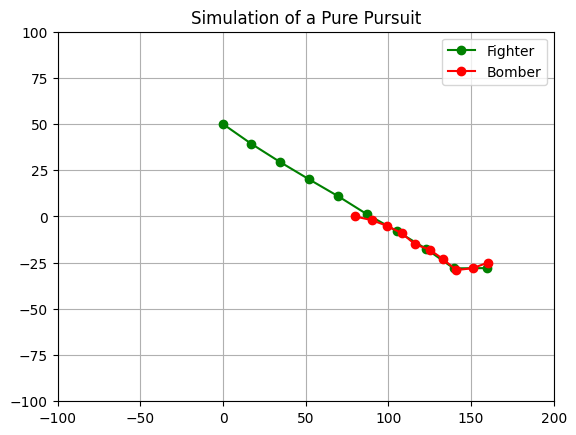

In [8]:
xBomberPositions = [80, 90, 99, 108, 116, 125, 133, 141, 151, 160, 169, 179, 180]
yBomberPositions = [0, -2, -5, -9, -15, -18, -23, -29, -28, -25, -21, -20, -17]
xFighterInitial, yFighterInitial = 0, 50
fighterSpeed = 20
purePursuit(xBomberPositions, yBomberPositions, xFighterInitial, yFighterInitial, fighterSpeed)